# Stock Market Prediction using LSTM by Azeem

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler

In [2]:
stocksymbol='GAIL.NS'

In [3]:
d=yf.download(tickers=stocksymbol,period='5y',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [4]:
type(d)

pandas.core.frame.DataFrame

In [5]:
d.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-19,95.300003,95.300003,91.400002,91.733330,72.365166,14154360
2019-07-22,91.133331,92.500000,89.900002,92.000000,72.575523,10270485
2019-07-23,91.966667,93.866669,91.833336,92.400002,72.891060,7824837
2019-07-24,92.733330,92.733330,90.133331,91.099998,71.865547,8352232
2019-07-25,91.099998,91.666664,89.433334,89.833336,70.866333,12123903


In [6]:
d.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-12,229.699997,233.800003,224.699997,228.710007,228.710007,26631708
2024-07-15,229.600006,238.000000,228.089996,237.160004,237.160004,32695974
2024-07-16,238.199997,239.110001,233.000000,233.410004,233.410004,19213934
2024-07-18,233.509995,233.869995,227.759995,228.860001,228.860001,14554717
2024-07-19,228.860001,228.860001,219.750000,221.000000,221.000000,8587950


In [7]:
op=d[['Open']]

<Axes: xlabel='Date'>

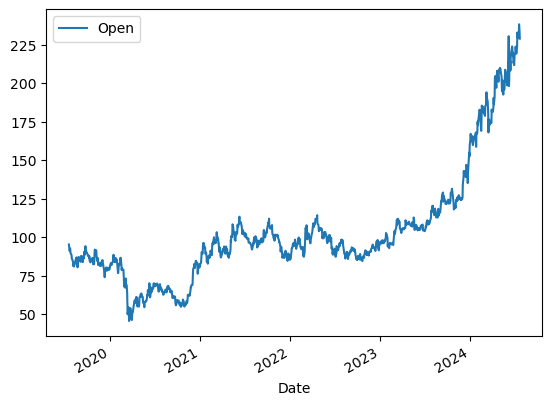

In [8]:
op.plot()

In [9]:
ds=op.values

In [10]:
ds

array([[ 95.30000305],
       [ 91.1333313 ],
       [ 91.96666718],
       ...,
       [238.19999695],
       [233.50999451],
       [228.86000061]])

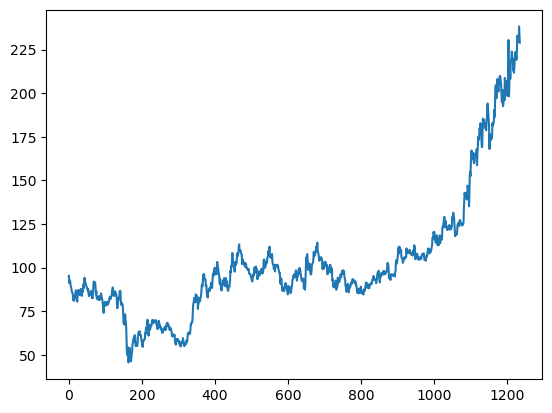

In [11]:
plt.plot(ds)

In [12]:
normal=MinMaxScaler(feature_range=(0,1))
ds_scale=normal.fit_transform(np.array(ds).reshape(-1,1))

In [13]:
len(ds_scale),len(ds)

(1235, 1235)

### Test and Train Data

In [14]:
train_size=int(len(ds_scale)*0.70)
test_size=len(ds_scale)-train_size

#### Splitting  Data

In [15]:
ds_train, ds_test= ds_scale[0:train_size,:],ds_scale[train_size:len(ds_scale),:1]

In [16]:
len(ds_train),len(ds_test)

(864, 371)

In [17]:
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [18]:
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [19]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((763, 100), (763,), (270, 100), (270,))

In [20]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
from tensorflow import keras

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

### Creating LSTM 

In [27]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 282ms/step - loss: 0.0247 - val_loss: 0.0777
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - loss: 0.0036 - val_loss: 0.0241
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - loss: 0.0026 - val_loss: 0.0312
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - loss: 0.0013 - val_loss: 0.0135
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - loss: 8.7775e-04 - val_loss: 0.0034
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step - loss: 0.0010 - val_loss: 0.0025
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 360ms/step - loss: 9.0044e-04 - val_loss: 0.0030
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 285ms/step - loss: 8.7029e-04 - val_loss: 0.0031
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - loss: 7.5678e-04 - val_loss: 0.0029
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - loss: 7.9428e-04 - val_loss: 0.0035
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - loss: 7.5563e-04 - val_loss: 0.0020
Epoch 12/100
12/

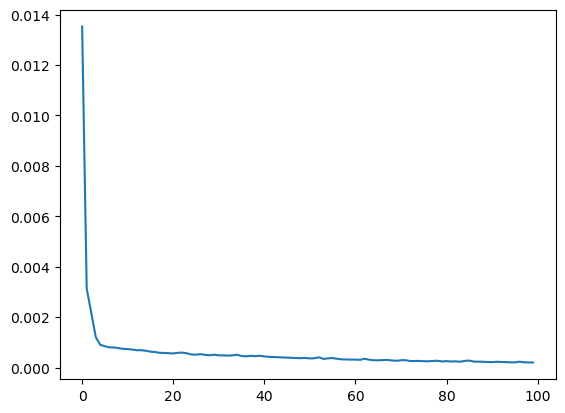

In [33]:
loss=model.history.history['loss']
plt.plot(loss)

In [34]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


In [37]:
train_predict = normal.inverse_transform(train_predict)
test_predict = normal.inverse_transform(test_predict)

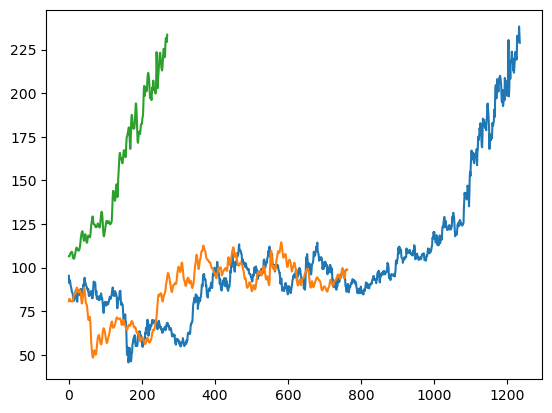

In [39]:
plt.plot(normal.inverse_transform(ds_scale))
plt.plot(train_predict)
plt.plot(test_predict)

In [40]:
test=np.vstack((train_predict,test_predict))

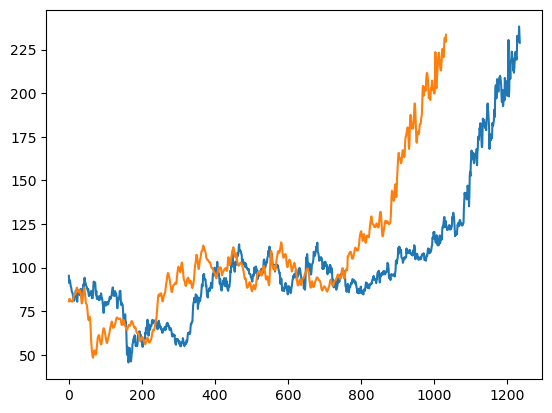

In [42]:
plt.plot(normal.inverse_transform(ds_scale))
plt.plot(test)

In [43]:
len(ds_test)

371

In [45]:
future=ds_test[270:]

In [46]:
future=future.reshape(1,-1)

In [47]:
tmp=list(future)

In [48]:
future.shape

(1, 101)

In [50]:
tmp=tmp[0].tolist()

In [51]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp)>100):
        future = np.array(tmp[1:])
        future=future.reshape(1,-1)
        future = future.reshape((1, n_steps, 1))
        yhat = model.predict(future, verbose=0)
        tmp.extend(yhat[0].tolist())
        tmp = tmp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        future = future.reshape((1, n_steps,1))
        yhat = model.predict(future, verbose=0)
        tmp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.9698694348335266], [0.9652443528175354], [0.9668891429901123], [0.9715749621391296], [0.9780504703521729], [0.9855899214744568], [0.9934805035591125], [1.0010478496551514], [1.0077781677246094], [1.013399362564087], [1.0178934335708618], [1.0214616060256958], [1.024451494216919], [1.0272712707519531], [1.0303033590316772], [1.0338417291641235], [1.0380514860153198], [1.0429630279541016], [1.0484895706176758], [1.054461121559143], [1.0606716871261597], [1.0669217109680176], [1.0730539560317993], [1.0789754390716553], [1.0846647024154663], [1.0901631116867065], [1.095557451248169], [1.1009565591812134], [1.1064661741256714], [1.11217200756073]]


In [52]:
len(ds_scale)

1235

In [59]:
plot_new=np.arange(1,104)
plot_pred=np.arange(101,131)

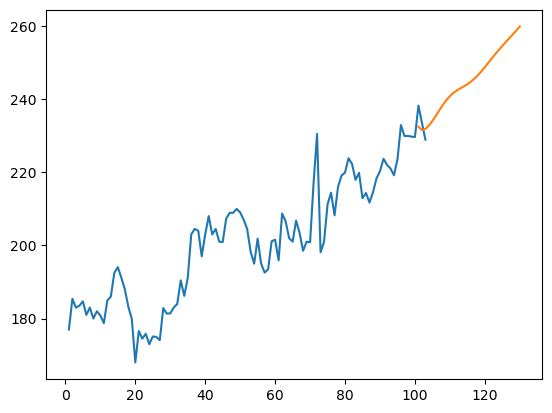

In [60]:
plt.plot(plot_new, normal.inverse_transform(ds_scale[1132:]))
plt.plot(plot_pred, normal.inverse_transform(lst_output))

In [61]:
dsnew=ds_scale.tolist()

In [63]:
len(dsnew)

1235

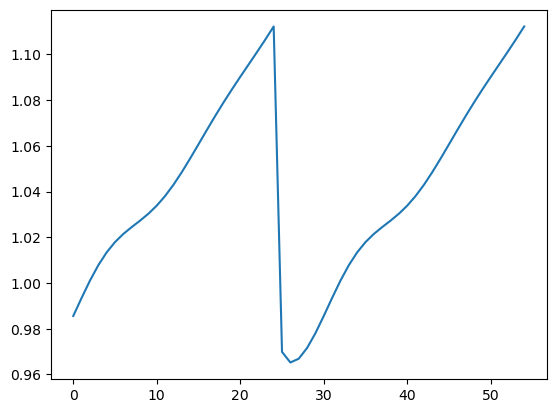

In [70]:
dsnew.extend(lst_output)
plt.plot(dsnew[1300:])

In [71]:
final_graph = normal.inverse_transform(dsnew).tolist()

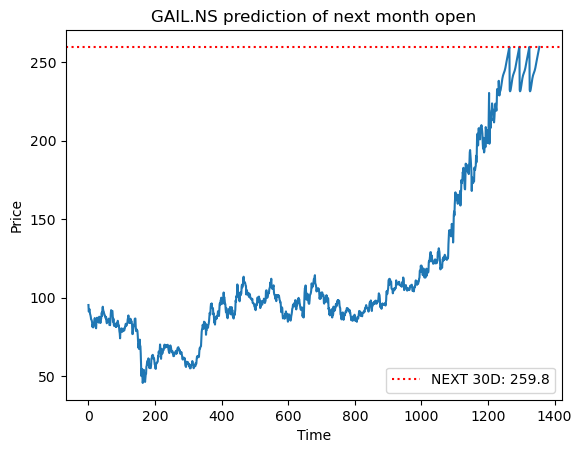

In [73]:
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stocksymbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()